In [1]:
consumer_key = ''
consumer_key_secret = ''
access_token = ''
access_token_secret = ''

In [2]:
import tweepy 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=False)

In [4]:
number_tweets = 400
tweet_id = []
time = []
user_id = []
text = []

In [95]:
search_term = '#Bitcoin -filter:retweets'
cursor = tweepy.Cursor(api.search_tweets , q = search_term, tweet_mode = 'extended', lang = 'en').items(number_tweets)

In [6]:
for i in cursor:
    tweet_id.append(i.id)
    time.append(i.created_at)
    user_id.append(i.user.screen_name)
    text.append(i.full_text)

In [7]:
df = pd.DataFrame({'Tweet ID': tweet_id, 'Time' : time, 'User ID' : user_id, 'Text' : text})
df

,Tweet ID,Time,User ID,Text
0,1545234410735374338,2022-07-08 02:32:47+00:00,icomplex1,Nothing to worry bout wen ya know what’s good....
1,1545234409422524418,2022-07-08 02:32:46+00:00,CryptoModelTMax,@girlgone_crypto my first #crypto was #bitcoin...
2,1545234391047315456,2022-07-08 02:32:42+00:00,VarunsSinha,Current Bitcoin price is $21988. Follow for re...
3,1545234346914619392,2022-07-08 02:32:32+00:00,iamroy_p,Zoom out. #Bitcoin https://t.co/JlZJgGHGIC
4,1545234344821784579,2022-07-08 02:32:31+00:00,Handshaking_Es,"Bitcoin y Rsk\nSábado, 9 de julio · 9:00 – 10:..."
...,...,...,...,...
395,1545228123842613248,2022-07-08 02:07:48+00:00,DanKoosh,Top #DomainNames 4 Sale/Lease! - VISIT: https:...
396,1545228123335262208,2022-07-08 02:07:48+00:00,carlindosousa,@bgarlinghouse @WSJopinion ... seems to be a b...
397,1545228119816441856,2022-07-08 02:07:47+00:00,jennyjuliandri1,@AirdropDet The ideas of the team and that sin...
398,1545228099864100866,2022-07-08 02:07:42+00:00,TahsanAlamZahid,"If you own 1 #Bitcoin, you’re part of the 0.2%..."


In [8]:
df['Text']

0      Nothing to worry bout wen ya know what’s good....
1      @girlgone_crypto my first #crypto was #bitcoin...
2      Current Bitcoin price is $21988. Follow for re...
3             Zoom out. #Bitcoin https://t.co/JlZJgGHGIC
4      Bitcoin y Rsk\nSábado, 9 de julio · 9:00 – 10:...
                             ...                        
395    Top #DomainNames 4 Sale/Lease! - VISIT: https:...
396    @bgarlinghouse @WSJopinion ... seems to be a b...
397    @AirdropDet The ideas of the team and that sin...
398    If you own 1 #Bitcoin, you’re part of the 0.2%...
399    Current Bitcoin price is $22111. Follow for re...
Name: Text, Length: 400, dtype: object

In [9]:
import re
def clean_tweet(text):
    text = re.sub('#[A-Za-z0-9]+', '', text) #removes any number and word starting with '#'
    text = re.sub(r'\b\w{1,2}\b', '', text) # remove any word that is less than length of 2
    text = re.sub('[0-9\n]','',text) #removes any number from the tweet
    text = re.sub(r'[^\w\s]', '', text) #removes puncuation from the tweet '^\w\s' this means anything that isn't a word or whitespace
    text = re.sub(r'\b(\w+)(?:\W+\1\b)+', r'\1', text) #find a letter or word with one or more occurence and replace that with one occurece
    return text

In [10]:
df['Text'] = df['Text'].apply(clean_tweet)
df.head()

,Tweet ID,Time,User ID,Text
0,1545234410735374338,2022-07-08 02:32:47+00:00,icomplex1,Nothing worry bout wen know what good Thee ...
1,1545234409422524418,2022-07-08 02:32:46+00:00,CryptoModelTMax,girlgone_crypto first was averaged for ye...
2,1545234391047315456,2022-07-08 02:32:42+00:00,VarunsSinha,Current Bitcoin price Follow for recent Bitc...
3,1545234346914619392,2022-07-08 02:32:32+00:00,iamroy_p,Zoom out httpsJlZJgGHGIC
4,1545234344821784579,2022-07-08 02:32:31+00:00,Handshaking_Es,Bitcoin RskSábado julio am Building wor...


In [11]:
df.to_csv('Bitcoin.csv')

In [84]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

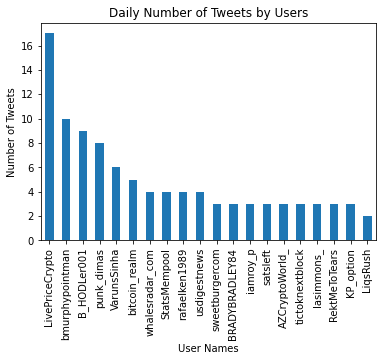

In [13]:
df['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [109]:
bitcoin = df['Tweet ID'].count()
bitcoin

400

In [16]:
number_tweets2 = 400
tweet_id2 = []
time2 = []
user_id2 = []
text2 = []

In [17]:
search_term2 = '#Altcoin -filter:retweets'
cursor2 = tweepy.Cursor(api.search_tweets , q = search_term2, tweet_mode = 'extended', lang = 'en').items(number_tweets2)

In [18]:
for i in cursor2:
    tweet_id2.append(i.id)
    time2.append(i.created_at)
    user_id2.append(i.user.screen_name)
    text2.append(i.full_text)

In [19]:
df2 = pd.DataFrame({'Tweet ID': tweet_id2, 'Time' : time2, 'User ID' : user_id2, 'Text' : text2})
df2

,Tweet ID,Time,User ID,Text
0,1545234192958726145,2022-07-08 02:31:55+00:00,CardanoNewsFeed,THIS KEY CARDANO INDICATOR IS READY TO POP!\n\...
1,1545233727760076800,2022-07-08 02:30:04+00:00,PartyGuy6969,#EverRise $RISE #EverRiseV3 #EverRevoke #DeFi ...
2,1545233452353540096,2022-07-08 02:28:58+00:00,droptown_io,US Treasury Develops 'Framework' for Internati...
3,1545233165601583105,2022-07-08 02:27:50+00:00,Dockbullrun,It's Really a Great News @docknetwork is intr...
4,1545233162267131905,2022-07-08 02:27:49+00:00,DK64Trades,LOL SO I Turned $100-$5k in 2 days buying shit...
...,...,...,...,...
57,1545211625531183108,2022-07-08 01:02:14+00:00,WINC_ev,"@bittybitbit86 GL, for my #Altcoin bags 2018 b..."
58,1545211317702852608,2022-07-08 01:01:01+00:00,topstonks,$NEXO was the 17th most mentioned on 4chan ove...
59,1545211196420542464,2022-07-08 01:00:32+00:00,droptown_io,Bitcoin Core Developer Pieter Wuille Scales Ba...
60,1545211073623724041,2022-07-08 01:00:03+00:00,btcdominance,Current BTC Dominance: 43.13% #Bitcoin #Altcoi...


In [20]:
df2['Text'] = df2['Text'].apply(clean_tweet)
df2.head()

,Tweet ID,Time,User ID,Text
0,1545234192958726145,2022-07-08 02:31:55+00:00,CardanoNewsFeed,THIS KEY CARDANO INDICATOR READY POP httpsMS...
1,1545233727760076800,2022-07-08 02:30:04+00:00,PartyGuy6969,RISE httpsQmOmqS
2,1545233452353540096,2022-07-08 02:28:58+00:00,droptown_io,Treasury Develops Framework for International...
3,1545233165601583105,2022-07-08 02:27:50+00:00,Dockbullrun,Really Great News docknetwork introducing ...
4,1545233162267131905,2022-07-08 02:27:49+00:00,DK64Trades,LOL Turned days buying shit coinsShould ...


In [21]:
df2.to_csv('Altcoin.csv')

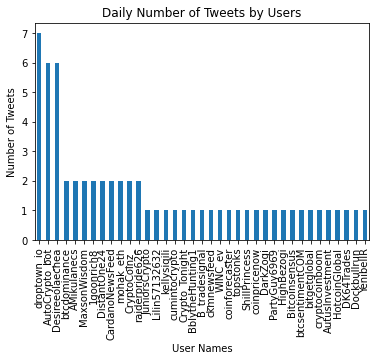

In [22]:
df2['User ID'].value_counts().plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [107]:
altcoin = df2['Tweet ID'].count()
altcoin

62

In [26]:
number_tweets3 = 400
tweet_id3 = []
time3 = []
user_id3 = []
text3 = []

In [27]:
search_term3 = '#Coindesk -filter:retweets'
cursor3 = tweepy.Cursor(api.search_tweets , q = search_term3, tweet_mode = 'extended', lang = 'en').items(number_tweets3)

In [28]:
for i in cursor3:
    tweet_id3.append(i.id)
    time3.append(i.created_at)
    user_id3.append(i.user.screen_name)
    text3.append(i.full_text)

In [29]:
df3 = pd.DataFrame({'Tweet ID': tweet_id3, 'Time' : time3, 'User ID' : user_id3, 'Text' : text3})
df3

,Tweet ID,Time,User ID,Text
0,1545226174892228610,2022-07-08 02:00:03+00:00,BTCticker,One Bitcoin now worth $22113.943. Market Cap $...
1,1545201545196830722,2022-07-08 00:22:11+00:00,codedtrader,Bulls testing resistance once again on the dai...
2,1545195976637431813,2022-07-08 00:00:03+00:00,BTCticker,One Bitcoin now worth $21629.615. Market Cap $...
3,1545189547297742848,2022-07-07 23:34:30+00:00,yupitsmegabe,#Polygon Joins #Solana in Bringing #Web3 to #S...
4,1545165776784658436,2022-07-07 22:00:03+00:00,BTCticker,One Bitcoin now worth $21656.610. Market Cap $...
...,...,...,...,...
209,1541776915626958848,2022-06-28 13:33:56+00:00,JafarovaTrade,"JUST IN: According to #CoinDesk Korea, Do Kwon..."
210,1541753291595563015,2022-06-28 12:00:03+00:00,BTCticker,One Bitcoin now worth $20996.353. Market Cap $...
211,1541723089855201280,2022-06-28 10:00:03+00:00,BTCticker,One Bitcoin now worth $21049.232. Market Cap $...
212,1541692892015624192,2022-06-28 08:00:03+00:00,BTCticker,One Bitcoin now worth $20859.880. Market Cap $...


In [30]:
df3['Text'] = df3['Text'].apply(clean_tweet)
df3.head()

,Tweet ID,Time,User ID,Text
0,1545226174892228610,2022-07-08 02:00:03+00:00,BTCticker,One Bitcoin now worth Market Cap Billion Bas...
1,1545201545196830722,2022-07-08 00:22:11+00:00,codedtrader,Bulls testing resistance once again the daily...
2,1545195976637431813,2022-07-08 00:00:03+00:00,BTCticker,One Bitcoin now worth Market Cap Billion Bas...
3,1545189547297742848,2022-07-07 23:34:30+00:00,yupitsmegabe,Joins Bringing httpswzmlKFpKer
4,1545165776784658436,2022-07-07 22:00:03+00:00,BTCticker,One Bitcoin now worth Market Cap Billion Bas...


In [31]:
df3.to_csv('Coindesk.csv')

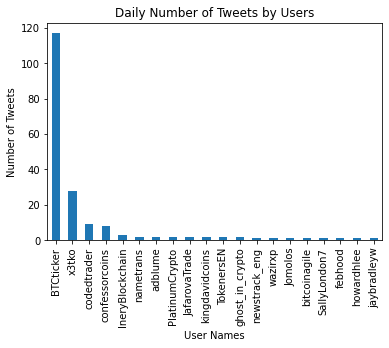

In [32]:
df3['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [106]:
coindesk = df3['Tweet ID'].count()
coindesk

214

In [33]:
number_tweets4 = 400
tweet_id4 = []
time4 = []
user_id4 = []
text4 = []

In [34]:
search_term4 = '#Cryptocurrency -filter:retweets'
cursor4 = tweepy.Cursor(api.search_tweets , q = search_term4, tweet_mode = 'extended', lang = 'en').items(number_tweets4)

In [35]:
for i in cursor4:
    tweet_id4.append(i.id)
    time4.append(i.created_at)
    user_id4.append(i.user.screen_name)
    text4.append(i.full_text)

In [36]:
df4 = pd.DataFrame({'Tweet ID': tweet_id4, 'Time' : time4, 'User ID' : user_id4, 'Text' : text4})
df4

,Tweet ID,Time,User ID,Text
0,1545238238490611712,2022-07-08 02:47:59+00:00,fazan_peace27,"@AirdropStario One of best project, that I bel..."
1,1545238207435943936,2022-07-08 02:47:52+00:00,DerekTMcKinney,🤓🤔👍 #knownews ##blockchain ##cryptocurrency #b...
2,1545238201299640322,2022-07-08 02:47:50+00:00,NFTCryptoSmart,Market Sentiment: Fear\n\nEthereum Fear and Gr...
3,1545238197541949440,2022-07-08 02:47:50+00:00,SaitaKanOnline,Where are all the Top G's at?\n\n#Saitama #Sai...
4,1545238176494538754,2022-07-08 02:47:45+00:00,DerekTMcKinney,🤓🤔👍 #knownews ##blockchain ##cryptocurrency #b...
...,...,...,...,...
395,1545220693037555712,2022-07-08 01:38:16+00:00,LockkMack,When it comes to Recover of stolen accounts an...
396,1545220632383725568,2022-07-08 01:38:02+00:00,Lisa___Adrian,$35k made in a minute💸Call it lucky but we’re ...
397,1545220561911029760,2022-07-08 01:37:45+00:00,DavidRindfleis1,#WAXP up 5.89% hail #Wombat #dungeonmaster #...
398,1545220553140756485,2022-07-08 01:37:43+00:00,_Crypto_Alerts,🚨🚨🚨 Crypto alert:\n\n• Bollinger Bands Breakou...


In [37]:
df4['Text'] = df4['Text'].apply(clean_tweet)
df4.head()

,Tweet ID,Time,User ID,Text
0,1545238238490611712,2022-07-08 02:47:59+00:00,fazan_peace27,AirdropStario One best project that believe ...
1,1545238207435943936,2022-07-08 02:47:52+00:00,DerekTMcKinney,NFTs and games remain intact amid coldes...
2,1545238201299640322,2022-07-08 02:47:50+00:00,NFTCryptoSmart,Market Sentiment FearEthereum Fear and Greed I...
3,1545238197541949440,2022-07-08 02:47:50+00:00,SaitaKanOnline,Where are all the Top
4,1545238176494538754,2022-07-08 02:47:45+00:00,DerekTMcKinney,and South Korea Share Data Crypto Cas...


In [38]:
df4.to_csv('Cryptocurrency.csv')

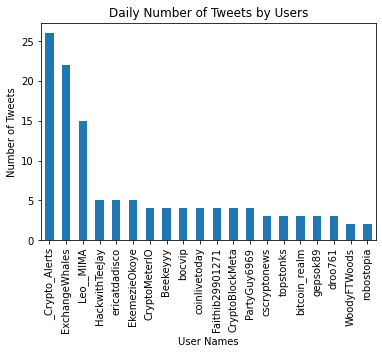

In [39]:
df4['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [105]:
crypto = df4['Tweet ID'].count()
crypto

400

In [43]:
number_tweets5 = 400
tweet_id5 = []
time5 = []
user_id5 = []
text5 = []

In [44]:
search_term5 = '#Gold -filter:retweets'
cursor5 = tweepy.Cursor(api.search_tweets , q = search_term5, tweet_mode = 'extended', lang = 'en').items(number_tweets5)

In [45]:
for i in cursor5:
    tweet_id5.append(i.id)
    time5.append(i.created_at)
    user_id5.append(i.user.screen_name)
    text5.append(i.full_text)

In [46]:
df5 = pd.DataFrame({'Tweet ID': tweet_id5, 'Time' : time5, 'User ID' : user_id5, 'Text' : text5})
df5

,Tweet ID,Time,User ID,Text
0,1545241278400843776,2022-07-08 03:00:04+00:00,stargeek13,Amethyst and Sterling Silver Ribbon Pendant Ne...
1,1545241268346839040,2022-07-08 03:00:02+00:00,ausecure,Streaming #Gold $1746 +$2.4/0.14% #Silver $19....
2,1545240715449380864,2022-07-08 02:57:50+00:00,prettypenstudio,Gold glitter Calligraphy ink 😀 #calligraphy #i...
3,1545239928942264320,2022-07-08 02:54:42+00:00,AnnaYod89596386,Corning corelle gold butterfly print hook hand...
4,1545239438325911556,2022-07-08 02:52:45+00:00,MarlosFinds,MarlosMarvelousFinds #Etsy Shop has Only First...
...,...,...,...,...
395,1545144619289157637,2022-07-07 20:35:59+00:00,roding333,How is gold plating done? https://t.co/9b9jCel...
396,1545143920283320321,2022-07-07 20:33:12+00:00,BirchGold,Steve Bannon: Here's Why it's CRITICAL to Inve...
397,1545143814938959873,2022-07-07 20:32:47+00:00,Eracey3,#ASX TO RISE \n#DowJones jumped 1.12%. S&amp;P...
398,1545143706671583240,2022-07-07 20:32:21+00:00,CellarPolitics,#Gold to remain relevant as hedging asset in H...


In [47]:
df5['Text'] = df5['Text'].apply(clean_tweet)
df5.head()

,Tweet ID,Time,User ID,Text
0,1545241278400843776,2022-07-08 03:00:04+00:00,stargeek13,Amethyst and Sterling Silver Ribbon Pendant Ne...
1,1545241268346839040,2022-07-08 03:00:02+00:00,ausecure,Streaming
2,1545240715449380864,2022-07-08 02:57:50+00:00,prettypenstudio,Gold glitter Calligraphy ink httpsYZxe...
3,1545239928942264320,2022-07-08 02:54:42+00:00,AnnaYod89596386,Corning corelle gold butterfly print hook hand...
4,1545239438325911556,2022-07-08 02:52:45+00:00,MarlosFinds,MarlosMarvelousFinds Shop has Only FirstClass...


In [48]:
df5.to_csv('Gold.csv')

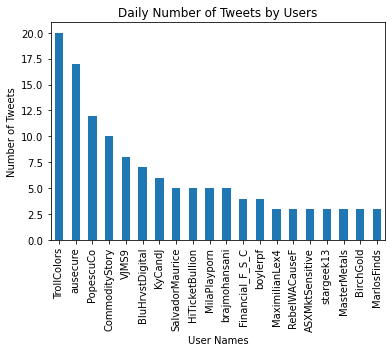

In [49]:
df5['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [104]:
gold = df5['Tweet ID'].count()
gold

400

In [51]:
number_tweets6 = 400
tweet_id6 = []
time6 = []
user_id6 = []
text6 = []

In [52]:
search_term6 = '#APPL -filter:retweets'
cursor6 = tweepy.Cursor(api.search_tweets , q = search_term6, tweet_mode = 'extended', lang = 'en').items(number_tweets6)

In [53]:
for i in cursor6:
    tweet_id6.append(i.id)
    time6.append(i.created_at)
    user_id6.append(i.user.screen_name)
    text6.append(i.full_text)

In [54]:
df6 = pd.DataFrame({'Tweet ID': tweet_id6, 'Time' : time6, 'User ID' : user_id6, 'Text' : text6})
df6

,Tweet ID,Time,User ID,Text
0,1545183012026929152,2022-07-07 23:08:32+00:00,toyokotoshi,HEAT MAP-US major Index / Stocks (2022.07.07) ...
1,1545164675700051968,2022-07-07 21:55:41+00:00,2smokesrule,@MarketRebels #appl calls
2,1545163870565593089,2022-07-07 21:52:29+00:00,mrscrypto411,"🎯 nailed it\n\n$SPY was grinding up all day, b..."
3,1545120473868025857,2022-07-07 19:00:02+00:00,CryptoTreeMap,https://t.co/t6kVcSK6IH\n\nStock market:\n$PRX...
4,1545101578121740292,2022-07-07 17:44:57+00:00,cryptoshibe22,And we go up more...calls en fuego🚀#APPL #Stoc...
5,1545092977231417344,2022-07-07 17:10:46+00:00,im_ba1tazar,@1goonrich @cryptocom Yes! I like those! Love ...
6,1545089732878766082,2022-07-07 16:57:53+00:00,MrDavidNIO,Currently you get rewarded for shorting #NIO #...
7,1545072601034358784,2022-07-07 15:49:48+00:00,HOS_HouseOS,A Vintage Bedroom smart control? you don’t wan...
8,1545060097172201483,2022-07-07 15:00:07+00:00,CryptoTreeMap,https://t.co/t6kVcSsvk7\n\nStock market:\n$ETH...
9,1544804255399571456,2022-07-06 22:03:30+00:00,toyokotoshi,HEAT MAP-US major Index / Stocks (2022.07.06) ...


In [55]:
df6['Text'] = df6['Text'].apply(clean_tweet)
df6.head()

,Tweet ID,Time,User ID,Text
0,1545183012026929152,2022-07-07 23:08:32+00:00,toyokotoshi,HEAT MAP major Index Stocks httpswkbiQCmNb 米...
1,1545164675700051968,2022-07-07 21:55:41+00:00,2smokesrule,MarketRebels calls
2,1545163870565593089,2022-07-07 21:52:29+00:00,mrscrypto411,nailed SPY was grinding all day bounced off ...
3,1545120473868025857,2022-07-07 19:00:02+00:00,CryptoTreeMap,httpstkVcSKIHStock marketPRX TSM ETH AMD B...
4,1545101578121740292,2022-07-07 17:44:57+00:00,cryptoshibe22,And morecalls fuego


In [56]:
df6.to_csv('APPL.csv')

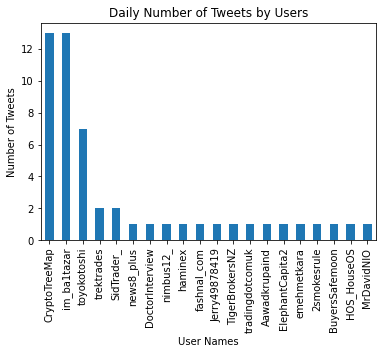

In [57]:
df6['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [103]:
apple = df6['Tweet ID'].count()
apple

55

In [59]:
number_tweets7 = 400
tweet_id7 = []
time7 = []
user_id7 = []
text7 = []

In [60]:
search_term7 = '#GOOG -filter:retweets'
cursor7 = tweepy.Cursor(api.search_tweets , q = search_term7, tweet_mode = 'extended', lang = 'en').items(number_tweets7)

In [61]:
for i in cursor7:
    tweet_id7.append(i.id)
    time7.append(i.created_at)
    user_id7.append(i.user.screen_name)
    text7.append(i.full_text)

In [62]:
df7 = pd.DataFrame({'Tweet ID': tweet_id7, 'Time' : time7, 'User ID' : user_id7, 'Text' : text7})
df7

,Tweet ID,Time,User ID,Text
0,1545233767429992448,2022-07-08 02:30:13+00:00,IOB_llc,#Google #GOOG #TechnicalIndicator Market Types...
1,1545164195074916360,2022-07-07 21:53:46+00:00,leoventuresllc,Google is the internet !! #google #googl #goog...
2,1545162462416207877,2022-07-07 21:46:53+00:00,dataspecscamp,When do we expect a dip? $GOOG $OXY $RBLX $SHO...
3,1545156645038309379,2022-07-07 21:23:46+00:00,leoventuresllc,Google...What Can I Say !! #google #googl #sto...
4,1545154335331328000,2022-07-07 21:14:35+00:00,Jake__Wujastyk,$GOOG #GOOG Updated chart from last week. \n\n...
...,...,...,...,...
94,1541827209337442308,2022-06-28 16:53:47+00:00,leoventuresllc,Google is the internet !! #google #googl #goog...
95,1541819657929326593,2022-06-28 16:23:46+00:00,leoventuresllc,Google...What Can I Say !! #google #googl #sto...
96,1541814721715720192,2022-06-28 16:04:09+00:00,McMcgregory,Top Stocks Based on Deep Learning: Returns up ...
97,1541813914282991620,2022-06-28 16:00:57+00:00,i_Know_First,Top Stocks Based on Deep Learning: Returns up ...


In [63]:
df7['Text'] = df7['Text'].apply(clean_tweet)
df7.head()

,Tweet ID,Time,User ID,Text
0,1545233767429992448,2022-07-08 02:30:13+00:00,IOB_llc,Market Types Extreme Fear View interacti...
1,1545164195074916360,2022-07-07 21:53:46+00:00,leoventuresllc,Google the internet httpsbVmXsEW
2,1545162462416207877,2022-07-07 21:46:53+00:00,dataspecscamp,When expect dip GOOG OXY RBLX SHOP ...
3,1545156645038309379,2022-07-07 21:23:46+00:00,leoventuresllc,GoogleWhat Can Say httpsbVmXsEW
4,1545154335331328000,2022-07-07 21:14:35+00:00,Jake__Wujastyk,GOOG Updated chart from last week Target hit ...


In [64]:
df7.to_csv('GOOG.csv')

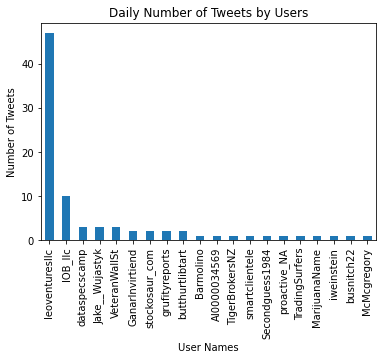

In [65]:
df7['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [66]:
google = df7['Tweet ID'].count()
google

99

In [67]:
number_tweets8 = 400
tweet_id8 = []
time8 = []
user_id8 = []
text8 = []

In [74]:
search_term8 = '#YAHOO -filter:retweets'
cursor8 = tweepy.Cursor(api.search_tweets , q = search_term8, tweet_mode = 'extended', lang = 'en').items(number_tweets8)

In [75]:
for i in cursor8:
    tweet_id8.append(i.id)
    time8.append(i.created_at)
    user_id8.append(i.user.screen_name)
    text8.append(i.full_text)

In [76]:
df8 = pd.DataFrame({'Tweet ID': tweet_id8, 'Time' : time8, 'User ID' : user_id8, 'Text' : text8})
df8

,Tweet ID,Time,User ID,Text
0,1545244285339324416,2022-07-08 03:12:01+00:00,HaveWeAllGoneM1,Stampede starts tomorrow 🤠YaHoooo #CalgaryStam...
1,1545237464809459712,2022-07-08 02:44:55+00:00,TammyLynCarbol,Happy Stampede Calgary! Be good to each other ...
2,1545232613522436096,2022-07-08 02:25:38+00:00,beerme1971,It smells like booze on the ctrain. Welcome to...
3,1545227433376464898,2022-07-08 02:05:03+00:00,TheGlobalHerald,The Fed's #Environment is 'demand destruction ...
4,1545225975364956160,2022-07-08 01:59:16+00:00,ShawnaMcLiesh,@modernwest @calgarystampede Woot! Can't wait ...
...,...,...,...,...
395,1542396996983603200,2022-06-30 06:37:55+00:00,LuxuryManuelle,💖FOLLOW EVERYONE WHO RETWEETS AND LIKES ⏩👑💌\n⏩...
396,1542387744927776769,2022-06-30 06:01:09+00:00,LuxuryManuelle,💖FOLLOW EVERYONE WHO RETWEETS AND LIKES ⏩👑🌷\n⏩...
397,1542383652646141952,2022-06-30 05:44:53+00:00,LuxuryManuelle,💖FOLLOW EVERYONE WHO RETWEETS AND LIKES ⏩👑⚡✨\n...
398,1542382587049558016,2022-06-30 05:40:39+00:00,LuxuryManuelle,💖FOLLOW EVERYONE WHO RETWEETS AND LIKES ⏩💞\n⏩ي...


In [77]:
df8['Text'] = df8['Text'].apply(clean_tweet)
df8.head()

,Tweet ID,Time,User ID,Text
0,1545244285339324416,2022-07-08 03:12:01+00:00,HaveWeAllGoneM1,Stampede starts tomorrow YaHoooo httpsrPUJW...
1,1545237464809459712,2022-07-08 02:44:55+00:00,TammyLynCarbol,Happy Stampede Calgary good each other and p...
2,1545232613522436096,2022-07-08 02:25:38+00:00,beerme1971,smells like booze the ctrain Welcome Stampe...
3,1545227433376464898,2022-07-08 02:05:03+00:00,TheGlobalHerald,The Fed demand destruction design Strategis...
4,1545225975364956160,2022-07-08 01:59:16+00:00,ShawnaMcLiesh,modernwest calgarystampede Woot Can wait see ...


In [78]:
df8.to_csv('YHOO.csv')

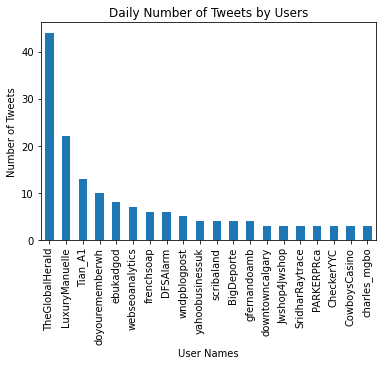

In [79]:
df8['User ID'].value_counts()[:20].plot(kind='bar')
plt.title('Daily Number of Tweets by Users')
plt.xlabel('User Names')
plt.ylabel('Number of Tweets')
plt.show()

In [80]:
yahoo = df8['Tweet ID'].count()
yahoo

400

In [82]:
tweet_per_day = [altcoin, bitcoin, coindesk, crypto, gold, apple, google, yahoo]
stock_names = ['AltCoin', 'Bitcoin', 'Coindesk', 'Crypto-Currency', 'Gold', 'APPLE', 'GOOG', 'YHOO']

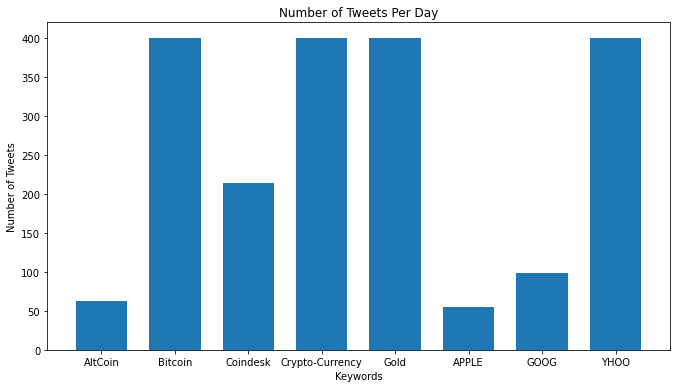

In [92]:
plt.rcParams["figure.figsize"] = [9.50, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.bar(stock_names, tweet_per_day, width=0.7)
plt.title('Number of Tweets Per Day')
plt.xlabel('Keywords')
plt.ylabel('Number of Tweets')
plt.show()